In [1]:
#Librairies necessary for the project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import PolynomialFeatures
%matplotlib inline
plt.rcParams['figure.figsize'] = (20.0, 10.0)

In [2]:
#Read the csv, use date column as a datetime index
df = pd.read_csv(r"/home/chin/Bureau/prog/Python/ogoxi/csv/Gironde Adour Dordogne/dronne_merged.csv", sep=";", parse_dates=['Date'], index_col="Date")


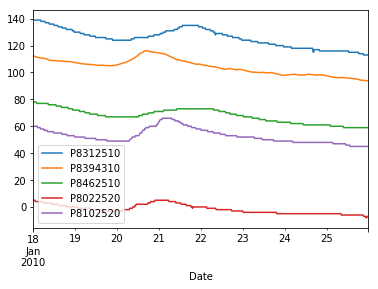

In [3]:
#Data resample on a 10 minutes step
resampled_df = df.resample('15T').mean()
#Fill the holes with time interpolation
interpolate_df = resampled_df.interpolate(method="time")
#Drop very first rows where interpolation cannot be possible
interpolate_df = interpolate_df.dropna()
#Scale the data
scaler = StandardScaler()
scalar_numpy = scaler.fit_transform(interpolate_df)
#Create a new dataset with the scaled data
scalar_df = pd.DataFrame(data=scalar_numpy, index=interpolate_df.index.values, columns=interpolate_df.columns.values)
#Plot the differents datasets to see the steps
#df['2010-01-18':'2010-01-25'].plot()
#resampled_df['2010-01-18':'2010-01-25'].plot()
interpolate_df['2010-01-18':'2010-01-25'].plot()
#scalar_df['2010-01-18':'2010-01-25'].plot()
poly = PolynomialFeatures(2)
poly_array = poly.fit_transform(scalar_df)
poly_df = pd.DataFrame(data=poly_array, index=scalar_df.index.values)
#poly_df['2010-01-18':'2010-01-25'].plot()
#df.plot()
#resampled_df.plot()
#interpolate_df.plot()
#scalar_df.plot()

In [23]:

from pandas import DataFrame
from pandas import concat

def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    """
    Frame a time series as a supervised learning dataset.
    Arguments:
        data: Sequence of observations as a list or NumPy array.
        n_in: Number of lag observations as input (X).
        n_out: Number of observations as output (y).
        dropnan: Boolean whether or not to drop rows with NaN values.
    Returns:
        Pandas DataFrame of series framed for supervised learning.
    """
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, -1, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    cols.append(df.shift(-n_out))
    names += [('var%d(t+%d)' % (j+1, n_out)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg
poly_lag_df = series_to_supervised(poly_df, 3, 3, True)
i=1
for columns in poly_lag_df :
    
    print(i)
    print(columns)
    i = i+1

1
var1(t-3)
2
var2(t-3)
3
var3(t-3)
4
var4(t-3)
5
var5(t-3)
6
var6(t-3)
7
var7(t-3)
8
var8(t-3)
9
var9(t-3)
10
var10(t-3)
11
var11(t-3)
12
var12(t-3)
13
var13(t-3)
14
var14(t-3)
15
var15(t-3)
16
var16(t-3)
17
var17(t-3)
18
var18(t-3)
19
var19(t-3)
20
var20(t-3)
21
var21(t-3)
22
var1(t-2)
23
var2(t-2)
24
var3(t-2)
25
var4(t-2)
26
var5(t-2)
27
var6(t-2)
28
var7(t-2)
29
var8(t-2)
30
var9(t-2)
31
var10(t-2)
32
var11(t-2)
33
var12(t-2)
34
var13(t-2)
35
var14(t-2)
36
var15(t-2)
37
var16(t-2)
38
var17(t-2)
39
var18(t-2)
40
var19(t-2)
41
var20(t-2)
42
var21(t-2)
43
var1(t-1)
44
var2(t-1)
45
var3(t-1)
46
var4(t-1)
47
var5(t-1)
48
var6(t-1)
49
var7(t-1)
50
var8(t-1)
51
var9(t-1)
52
var10(t-1)
53
var11(t-1)
54
var12(t-1)
55
var13(t-1)
56
var14(t-1)
57
var15(t-1)
58
var16(t-1)
59
var17(t-1)
60
var18(t-1)
61
var19(t-1)
62
var20(t-1)
63
var21(t-1)
64
var1(t-0)
65
var2(t-0)
66
var3(t-0)
67
var4(t-0)
68
var5(t-0)
69
var6(t-0)
70
var7(t-0)
71
var8(t-0)
72
var9(t-0)
73
var10(t-0)
74
var11(t-0)
75
var12(

In [28]:
print(poly_df)

                      0         1         2         3          4         5   \
2009-12-30 01:45:00  1.0 -0.407208  1.641305  0.480587  11.385197  0.660680   
2009-12-30 02:00:00  1.0 -0.407208  1.750387  0.513771  11.035957  0.833583   
2009-12-30 02:15:00  1.0 -0.407208  1.885762  0.513771  10.547020  0.948852   
2009-12-30 02:30:00  1.0 -0.407208  2.021136  0.513771  10.197780  1.064121   
2009-12-30 02:45:00  1.0 -0.407208  2.156510  0.513771   9.848540  1.179389   
2009-12-30 03:00:00  1.0 -0.407208  2.307548  0.513771   9.569148  1.294658   
2009-12-30 03:15:00  1.0 -0.372397  2.372997  0.513771   9.289756  1.409927   
2009-12-30 03:30:00  1.0 -0.372397  2.438447  0.513771   9.010364  1.582830   
2009-12-30 03:45:00  1.0 -0.372397  2.545851  0.513771   8.800819  1.698099   
2009-12-30 04:00:00  1.0 -0.372397  2.612979  0.513771   8.591275  1.871002   
2009-12-30 04:15:00  1.0 -0.372397  2.680106  0.513771   8.311883  2.043905   
2009-12-30 04:30:00  1.0 -0.372397  2.742200  0.5137

In [12]:
## import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

partial_time_lag = time_lag_df
#On enleve les colonnes > à l'instant T sauf la colonne objectif var2(t+n)
partial_time_lag = partial_time_lag.drop(partial_time_lag.columns[[8]],axis=1)
#Permet d'obtenir un array d'index correspondant à 80% des enregistrements du dataset
msk = np.random.rand(len(partial_time_lag)) < 0.8
#Permet de séparer les features en deux datasets, un pour entrainer le modèle et l'autre pour le tester
train_X = partial_time_lag[msk].drop('var2(t+1)',axis=1)
test_X = partial_time_lag[~msk].drop('var2(t+1)',axis=1)

#Idem pour le label, càd l'objectif qu'on cherche à atteindre
train_Y = partial_time_lag['var2(t+1)'][msk]
test_Y =  partial_time_lag['var2(t+1)'][~msk]

#L'objet scikit-learn permettant de faire la regression linéaire
regr = linear_model.LinearRegression()

#Entrainement du modèle
regr.fit(train_X,train_Y)

#Avec les features test non utilisés dans l'entrainement, on va faire de nouvelles prédictions
y_prediction = regr.predict(test_X)

#On affiche la variance, plus elle s'approche de 1 plus le modèle est bon
print("Variance : %.2f" %r2_score(test_Y, y_prediction))

#Les coefficients de chaque stations pour obtenir la valeur de la station objectif
myCol = ''
for column in train_X:
    myCol = myCol + column + ',   '
print(myCol)
print( regr.coef_)
print("Mean squared error: %.2f"
      % mean_squared_error(test_Y, y_prediction))
#plt.scatter(test_X., test_Y[:20],  color='black')
#plt.plot(test_Y[195:200], y_prediction[195:200], color='blue', linewidth=1)

result_df = pd.DataFrame()
result_df['observed'] = test_Y
result_df['predicted'] = y_prediction

print(result_df['2013-05-16':'2013-05-24'])
#scalar_df.K0790010['2013-05-16':'2013-05-24'].plot()
result_df['2013-05-16 00:00:00':'2013-05-16 06:00:00'].plot()
#plt.xticks(())
#plt.yticks(())
##
#plt.show()
#result_df[:100].plot(figsize=(20,10))
#plt.plot(transformed_df, y_prediction[195:200], color='blue', linewidth=1)

NameError: name 'time_lag_df' is not defined

In [57]:
def maximums(df, delta): 
    # return a dataframe including the water height peaks of each sensor
    # df is the data sample and delta is a parameter used to determine what's a peak or not
    # a value is considered a peak at t0 if all the values in [t0 - delta*T,..., to,..., t0 + delta*T] are 
    # below the one at t0
    
    dff = pd.DataFrame()
    dff = df.copy()
    
    n = len(dff.index)
    for col in dff:
        dff[col][n-1]=0 # cannot be a maximum
        
        increasing = True  
        for k in range(n-1):
            max_check= False  # value to mark a value as a maximum or not
            
            
            if increasing:
                if df[col][k+1]<df[col][k]: # if the height drops
                    increasing = False

                    if delta<=k and k+delta<n: # we check if the surrounding values are the below the current one
                        max_check = True
                        #print(col +": " + str(df[col][k]))
                        for i in range(1,delta+1):
                            if df[col][k-i] >= df[col][k] or df[col][k+i]>df[col][k]: 
                                max_check = False
            else: # if the heights are dropping, we simply check if the water rises again
                if df[col][k+1]>=df[col][k]:
                    increasing = True
            
            if not max_check: # we set the value to 0 if the value is not a maximum
                dff[col][k] = 0
                
    dff = dff[(dff.T != 0).any()] # removes the rows with no local maximum
    
    return dff
                
max_df = maximums(interpolate_df['2010-01-28 22:00:00':'2010-03-02 08:00:00'],4)

print(max_df)
#print(maximums(interpolate_df['2010-01-20':'2010-01-23'],3))           
            
            
    

                     P8312510  P8394310  P8462510  P8022520  P8102520
Date                                                                 
2010-01-30 01:00:00       0.0     94.70       0.0       0.0       0.0
2010-01-30 21:00:00       0.0     92.70       0.0       0.0       0.0
2010-02-01 00:15:00       0.0      0.00      86.0       0.0       0.0
2010-02-01 00:45:00       0.0      0.00       0.0       0.0      67.0
2010-02-01 01:00:00     152.0      0.00       0.0       0.0       0.0
2010-02-01 02:15:00       0.0      0.00       0.0      12.0       0.0
2010-02-01 03:15:00       0.0    122.90       0.0       0.0       0.0
2010-02-02 02:30:00       0.0     85.30       0.0       0.0       0.0
2010-02-02 04:30:00       0.0     84.80       0.0       0.0       0.0
2010-02-02 07:45:00       0.0     84.90       0.0       0.0       0.0
2010-02-02 10:45:00       0.0     84.50       0.0       0.0       0.0
2010-02-02 14:00:00       0.0     84.40       0.0       0.0       0.0
2010-02-02 18:45:00 

In [69]:
def rises(df):
    # will return a dataframe including the rises period for all sensors
    # there needs to be activities in delta followings rows for all sensors for it to be kept
    
    dff = maximums(df,4) # check if peaks are local maximums within a range of one hour
    delta = len(dff.columns)
    
    msk = np.array([False for k in range(len(dff.index))]) # mask used to keep the wanted rows
    rise_memory = [0 for k in range(len(dff.columns))] # stores the recent activity of each sensor
    
    k=0 # value of each row index
    for idx, row in dff.iterrows():
        
        # we set the activity of the column to delta if a peak happens in the row
        # we decrease it by 1 otherwise with a threshold of 0
        i = 0
        for col in dff:
            if row[col] != 0:
                rise_memory[i] = delta
            elif rise_memory[i] > 0:
                rise_memory[i] -= 1
            i += 1
        
        # if activities are within all values of memory rise then we consider that a water rise happened
        rise_check = True
        for memory in rise_memory:
            if memory == 0:
                rise_check = False
        
        # then all the according values of the mask are set to True
        if rise_check:
            for j in range(max(0,k-delta),k+1):
                msk[j] = True
        
        k += 1
    
    dff = dff[msk]
    
    return dff
            
print(rises(interpolate_df['2010-01-28 22:00:00':'2011-03-02 08:00:00']))   

                     P8312510  P8394310  P8462510  P8022520  P8102520
Date                                                                 
2010-01-30 01:00:00       0.0     94.70       0.0       0.0       0.0
2010-01-30 21:00:00       0.0     92.70       0.0       0.0       0.0
2010-02-01 00:15:00       0.0      0.00      86.0       0.0       0.0
2010-02-01 00:45:00       0.0      0.00       0.0       0.0      67.0
2010-02-01 01:00:00     152.0      0.00       0.0       0.0       0.0
2010-02-01 02:15:00       0.0      0.00       0.0      12.0       0.0
2010-02-01 03:15:00       0.0    122.90       0.0       0.0       0.0
2010-02-03 11:15:00       0.0     82.65       0.0       0.0       0.0
2010-02-03 20:00:00       0.0     82.40       0.0       0.0       0.0
2010-02-04 01:15:00     139.0      0.00       0.0       0.0      54.0
2010-02-04 02:30:00       0.0      0.00       0.0       2.0       0.0
2010-02-04 05:15:00       0.0     91.40       0.0       0.0       0.0
2010-02-04 06:15:00 

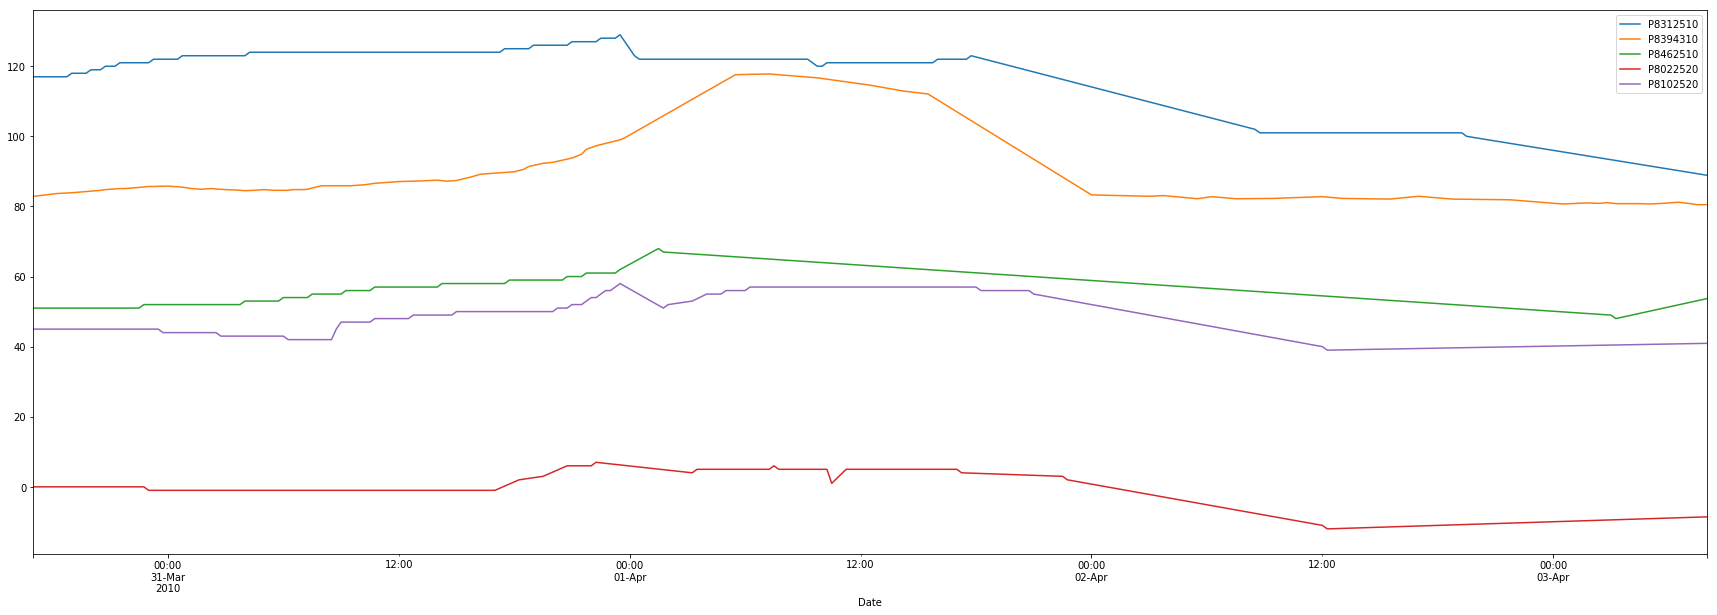

In [48]:
interpolate_df.plot()
plt.rcParams['figure.figsize'] = (35.0, 10.0)

TypeError: tuple indices must be integers, not str